#### importing the neccessary packages

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset in pandas

In [5]:
data = pd.read_csv(".\stud.csv")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\deepu\AppData\Local\Temp\ipykernel_17724\648891754.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(".\stud.csv")


#### checking for first 5 Rows 

In [6]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### checking the shape of the dataset

In [20]:
data.shape

(1000, 8)

##### checking the information about the dataset

In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


##### checking for the null values

In [8]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Dataset information
  - gender : sex of students -> (Male/female)
  - race/ethnicity : ethnicity of students -> (Group A, B, C, D,E)
  - parental level of education : parents final education -> (Bachelor's degree, some college, master's degree, high school)
  - lunch : having lunch before test (standard or free/reduced)
  - test preparation course : complete or not complete before test
  - math score
  - reading score
  - writing score

#### Data checks to perform
  - checks missing values
  - checks for duplicates
  - checks data types
  - checks the number of unique values of each column
  - checks statistics of data set
  - check various categories present in the different categorical column

In [72]:
data.duplicated().sum()

np.int64(0)

##### There are no duplicates values in the dataset

##### checking the number of unique values of each column

In [73]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### checks the statistics of data set

In [74]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
  - From the above description numerical data, all means are very close to each otherv-vbetween 65 and 69.
  - All standard deviations are also close between 14.5 to 15.5
  - While there is a minimum score 0 for math, writing_minimum is 10 and reading min is 17.

### Exploring data


In [79]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [80]:
print("categories in gender' variable: ", end=" ")
print(data['gender'].unique())

print("categories in race_ethnicity' variable: ", end=" ")
print(data['race_ethnicity'].unique())

print("categories in parental_level_of_education' variable: ", end=" ")
print(data['parental_level_of_education'].unique())

print("categories in lunch' variable: ", end=" ")
print(data['lunch'].unique())

print("categories in test_preparation_course' variable: ", end=" ")
print(data['test_preparation_course'].unique())

categories in gender' variable:  <StringArray>
['female', 'male']
Length: 2, dtype: str
categories in race_ethnicity' variable:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categories in parental_level_of_education' variable:  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
categories in lunch' variable:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
categories in test_preparation_course' variable:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [85]:
[feature for feature in data.columns if data[feature].dtype != 'o']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [87]:
# define numerical and categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype == 'str']
categorical_features = [feature for feature in data.columns if data[feature].dtype =='int64']

## print numerical and categorical features
print("Numerical features: ", end=" ")
print(numeric_features) 
print("Categorical features: ", end=" ")
print(categorical_features)

Numerical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Categorical features:  ['math_score', 'reading_score', 'writing_score']


In [89]:
#### adding columns for "Total Score" and "Average Score"
data['total_score'] = data['math_score'] + data['reading_score'] + data ['writing_score']
data['average_score'] = round((data['total_score']/3),2)   

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [96]:
## getting the full average marks of students having full marks in any sections

reading_full_marks = data[data['reading_score'] == 100]['average_score'].count()
writing_full_marks = data[data['writing_score'] == 100]['average_score'].count()
math_full_marks = data[data['math_score'] == 100]['average_score'].count()

In [95]:
data.iloc[[458]]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0


In [98]:
print(f"numbers of students with full marks in reading section: {reading_full_marks}")
print(f"numbers of students with full marks in writing section: {writing_full_marks}")
print(f"numbers of students with full marks in math section: {math_full_marks}")


numbers of students with full marks in reading section: 17
numbers of students with full marks in writing section: 14
numbers of students with full marks in math section: 7


In [99]:
reading_section_less_than20_marks = data[data['reading_score'] <=20]['average_score'].count()
writing_section_less_than20_marks = data[data['writing_score'] <=20]['average_score'].count()
math_section_less_than20_marks = data[data['math_score'] <=20]['average_score'].count()

print(f"numbers of students with less than 20 marks in reading section: {reading_section_less_than20_marks}")
print(f"numbers of students with less than 20 marks in writing section: {writing_section_less_than20_marks}")
print(f"numbers of students with less than 20 marks in math section: {math_section_less_than20_marks}")

numbers of students with less than 20 marks in reading section: 1
numbers of students with less than 20 marks in writing section: 3
numbers of students with less than 20 marks in math section: 4


## Insights:
 - From the above exploration we have found that the worst performance is in math 
 - Best performance is in reading section.

## Data Visualization
   ##### visualizing average score distribution to make some conclusions
   - Histogram
   - KDE plot

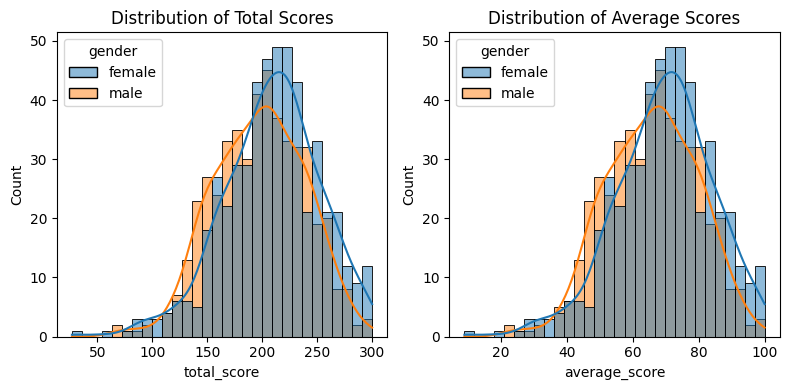

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot 1 on axs[0]
sns.histplot(data=data, x='total_score', kde=True, color='blue', bins=30, ax=axs[0], hue='gender')
axs[0].set_title('Distribution of Total Scores')

# Plot 2 on axs[1]
sns.histplot(data=data, x='average_score', color='lightgreen', hue='gender', ax=axs[1], kde=True, bins=30)
axs[1].set_title('Distribution of Average Scores')

plt.tight_layout()
plt.show()

#### Insights:
   - Female students performed well than male students
   

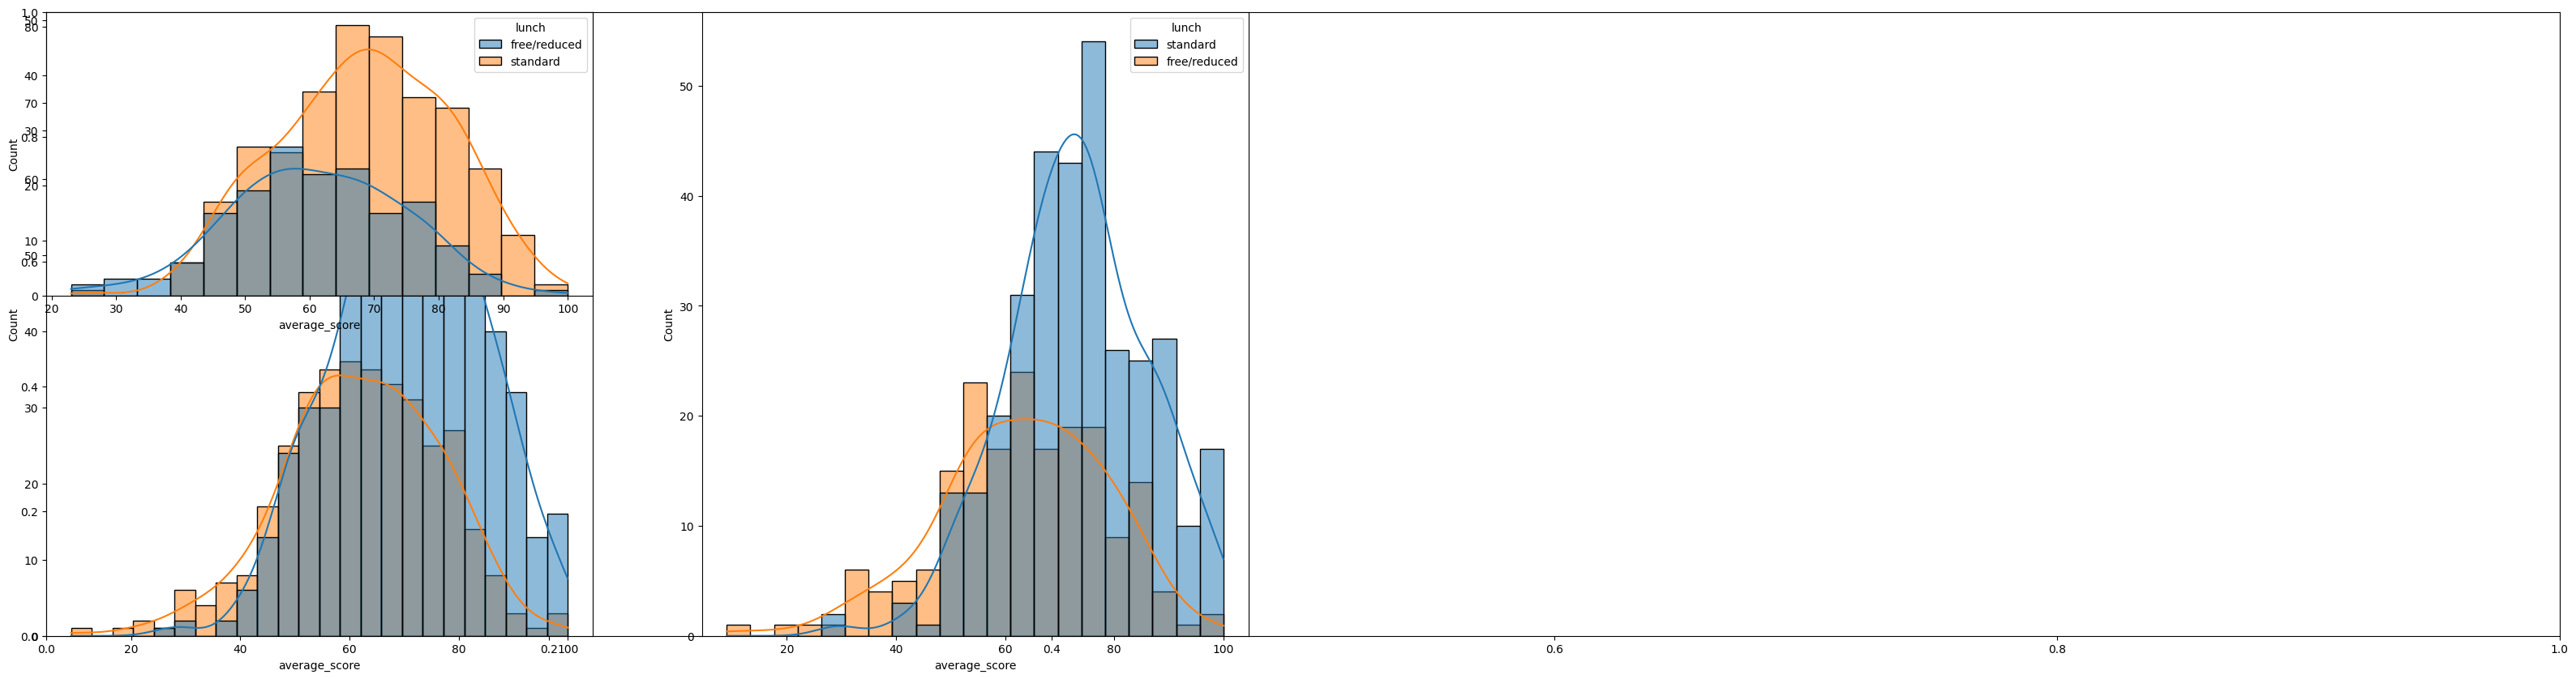

In [122]:
plt.subplots(1,1,figsize=(40,10))
plt.subplot(141)
sns.histplot(data=data, x='average_score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data['gender']=='female'], x='average_score',kde=True, hue='lunch')
plt.subplot(241)
sns.histplot(data=data[data['gender']=='male'], x='average_score', kde=True, hue='lunch')
plt.show()